In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('DataBalita.xlsx')
df

,NO,NAMA_ANAK,JK,Usia,BB,TB,Stunting
0,1,Nabila Hasna Amira,P,58,14.8,102.1,0
1,2,Marta Emi Masithoh,P,57,12.3,93.3,1
2,3,Nizama Kenzo Alvero,L,57,13.8,101.0,0
3,4,Haikal Cahya Wardana,L,57,14.8,102.3,0
4,5,Arsy Hilma Fadhila,P,59,14.1,97.5,0
...,...,...,...,...,...,...,...
186,187,Qurota Ayunindya S.,P,3,4.0,59.6,1
187,188,Lubna Alifia K.,P,3,3.7,55.1,0
188,189,Rayyanza Kenzie I.,L,1,3.5,54.5,0
189,190,Fazana Mayra R.,P,1,3.4,52.5,0


In [3]:
df = df.replace (["P"], 0)
df = df.replace (["L"], 1)
df.head(10)

,NO,NAMA_ANAK,JK,Usia,BB,TB,Stunting
0,1,Nabila Hasna Amira,0,58,14.8,102.1,0
1,2,Marta Emi Masithoh,0,57,12.3,93.3,1
2,3,Nizama Kenzo Alvero,1,57,13.8,101.0,0
3,4,Haikal Cahya Wardana,1,57,14.8,102.3,0
4,5,Arsy Hilma Fadhila,0,59,14.1,97.5,0
5,6,Fano Irwansyah,1,59,16.1,92.1,0
6,7,Alvin Zaidan Syafiulla,1,59,13.0,93.3,1
7,8,Naura Shafa Azizah,0,59,10.1,88.3,1
8,9,Muhammad Ali Al-Furqon,1,58,12.9,95.1,0
9,10,Muamar Hafiz Ramadhani,1,58,14.1,94.5,0


In [34]:
df = df.drop("NAMA_ANAK", axis=1); axis=1

In [35]:
df.shape

(191, 6)

In [36]:
df.dtypes

NO            int64
JK            int64
Usia          int64
BB          float64
TB          float64
Stunting      int64
dtype: object

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NO        191 non-null    int64  
 1   JK        191 non-null    int64  
 2   Usia      191 non-null    int64  
 3   BB        191 non-null    float64
 4   TB        191 non-null    float64
 5   Stunting  191 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 9.1 KB


In [38]:
df.isna().values.any()

False

In [39]:
df.corr()

,NO,JK,Usia,BB,TB,Stunting
NO,1.000000,-0.118587,-0.291604,-0.037801,-0.140724,-0.050641
JK,-0.118587,1.000000,0.123175,0.178210,0.170731,-0.065111
Usia,-0.291604,0.123175,1.000000,0.725884,0.784013,-0.104685
BB,-0.037801,0.178210,0.725884,1.000000,0.739303,-0.277925
TB,-0.140724,0.170731,0.784013,0.739303,1.000000,0.011681
Stunting,-0.050641,-0.065111,-0.104685,-0.277925,0.011681,1.000000


In [40]:
df.describe

<bound method NDFrame.describe of       NO  JK  Usia    BB     TB  Stunting
0      1   0    58  14.8  102.1         0
1      2   0    57  12.3   93.3         1
2      3   1    57  13.8  101.0         0
3      4   1    57  14.8  102.3         0
4      5   0    59  14.1   97.5         0
..   ...  ..   ...   ...    ...       ...
186  187   0     3   4.0   59.6         1
187  188   0     3   3.7   55.1         0
188  189   1     1   3.5   54.5         0
189  190   0     1   3.4   52.5         0
190  191   0     1   4.0   53.5         0

[191 rows x 6 columns]>

In [41]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

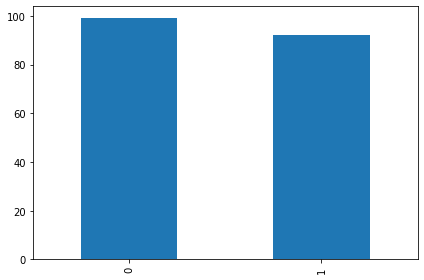

In [42]:
df['JK'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

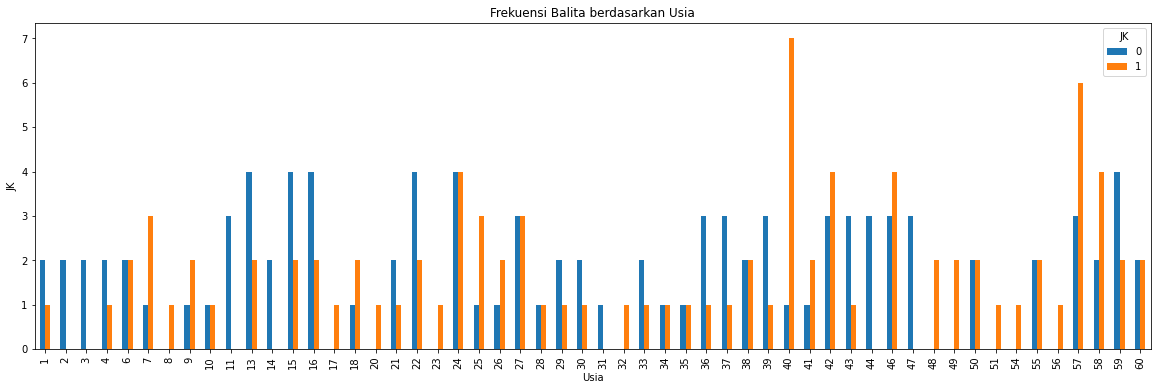

In [43]:
pd.crosstab(df.Usia,df.JK).plot(kind="bar",figsize=(20,6))
plt.title('Frekuensi Balita berdasarkan Usia')
plt.xlabel('Usia')
plt.ylabel('JK')
plt.show()

In [44]:
X = df.drop(columns='Stunting') 
X.head()

,NO,JK,Usia,BB,TB
0,1,0,58,14.8,102.1
1,2,0,57,12.3,93.3
2,3,1,57,13.8,101.0
3,4,1,57,14.8,102.3
4,5,0,59,14.1,97.5


In [46]:
y = df['Stunting']
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Stunting, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report 

# Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=10)

In [49]:
classifier = classifier.fit(X_train2, y_train2)

In [50]:
predicted = classifier.predict(X_test2)

In [51]:
print(classifier.score(X_test2, y_test2))

0.7435897435897436


In [52]:
y_true = y_test2
y_pred2 = predicted
print(accuracy_score(y_true, y_pred2))

0.7435897435897436


In [53]:
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[29  0]
 [10  0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        29
           1       0.00      0.00      0.00        10

    accuracy                           0.74        39
   macro avg       0.37      0.50      0.43        39
weighted avg       0.55      0.74      0.63        39



C:\Users\PERSONAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PERSONAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PERSONAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

#  KNN


In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=10)


In [56]:
knn=KNeighborsClassifier(n_neighbors=2)


In [57]:
knn.fit(X_train3,y_train3)


KNeighborsClassifier(n_neighbors=2)

In [58]:
knn.score(X_test3,y_test3)


0.7692307692307693

In [60]:
y_pred3 = knn.predict(X_test3)
print(confusion_matrix(y_test3, y_pred3))
print(classification_report(y_test3, y_pred3))

[[29  0]
 [ 9  1]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        29
           1       1.00      0.10      0.18        10

    accuracy                           0.77        39
   macro avg       0.88      0.55      0.52        39
weighted avg       0.82      0.77      0.69        39



In [61]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

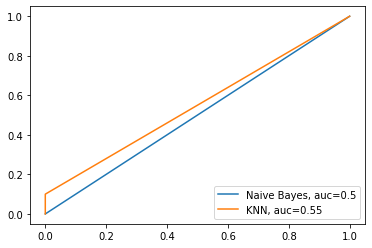

In [62]:
fpr, tpr, _ = metrics.roc_curve(y_test2,  y_pred2)
auc2 = metrics.roc_auc_score(y_test2, y_pred2)
plt.plot(fpr,tpr,label="Naive Bayes, auc="+str(auc2))

fpr, tpr, _ = metrics.roc_curve(y_test3,  y_pred3)
auc3 = metrics.roc_auc_score(y_test3, y_pred3)
plt.plot(fpr,tpr,label="KNN, auc="+str(auc3))

plt.legend(loc=4)
plt.show()